In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')
from utils import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [2]:
fr_stopwords = french_stopwords()

In [3]:
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]

## Decathlon

In [4]:
data = pd.read_csv('../csv/decathlon_reviews.csv')

In [5]:
np.count_nonzero(data.label == 1) / len(data)

0.8713345969450329

In [6]:
np.count_nonzero(data.label == -1) / len(data)

0.1286654030549671

In [7]:
len(data)

53814

In [8]:
review_list=np.array(list(data.review))
target = np.array(data.label)

### 1) version 1 : (PP: remove numbers + remove accent + 10000 features)

In [9]:
fname="decathlon/v1"

In [10]:
#[vectorizer, X] = build_vectorizer(review_list, stopwords=None, \
#                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

In [10]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
features = vectorizer.get_feature_names()
print(len(features))

10000


In [13]:
#vectorizer.get_feature_names()

In [12]:
X.shape

(53814, 10000)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [14]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


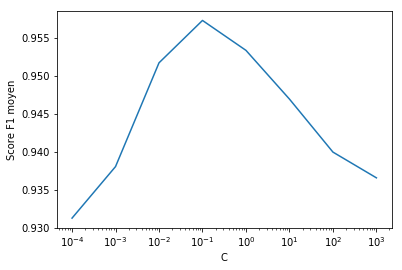

In [15]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [16]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.67300699300699307

In [17]:
ind_neg = np.argsort(clf.coef_).flatten()[0:10]
ind_pos = np.argsort(clf.coef_).flatten()[clf.coef_.shape[1]-10:]

In [23]:
pd.DataFrame(np.array(vectorizer.get_feature_names())[ind_neg], columns=["Mots négatifs"])

,Mots négatifs
0,déconseille
1,médiocre
2,déception
3,décu
4,décevant
5,déçut
6,mauvaise
7,déconseiller
8,dangereux
9,Déception


In [24]:
pd.DataFrame(np.array(vectorizer.get_feature_names())[ind_pos], columns=["Mots positifs"])

,Mots positifs
0,toutefois
1,instant
2,40
3,génial
4,grave
5,Excellent
6,apprécié
7,adore
8,excellent
9,abimer


### 2) version 2 : (PP: remove numbers + remove accent +remove stopwords+ steemming+10000 features)

In [19]:
fname="decathlon/v2"

In [20]:
#[vectorizer, X] = build_vectorizer(review_list, stopwords=fr_stopwords, b_stemming=True,\
#                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

In [21]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [23]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

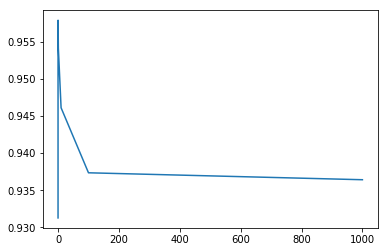

In [24]:
plt.plot(interval, mean_scores)
plt.show()

In [25]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.6709569110240627

In [26]:
words_freq=get_words_freq(vectorizer, X)


In [27]:
max(map(lambda x: x[1],words_freq))

14694

In [28]:
min(map(lambda x: x[1],words_freq))

2

### 3) version 3 : (PP: remove numbers + remove accent +steemming+min_f=0.0002 +max_f=0.02)

In [29]:
fname="decathlon/v3"

In [30]:
#[vectorizer, X] = build_vectorizer(review_list,b_rmaccent=True, b_rmnumbers=True,min_df=0.0002,max_df=0.02)

#save_vectorizer(vectorizer,fname)

In [31]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [32]:
features = vectorizer.get_feature_names()
print(len(features))

5544


In [33]:
words_freq=get_words_freq(vectorizer, X)

In [34]:
min(map(lambda x: x[1],words_freq))

11

In [35]:
max(map(lambda x: x[1],words_freq))

1281

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [37]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

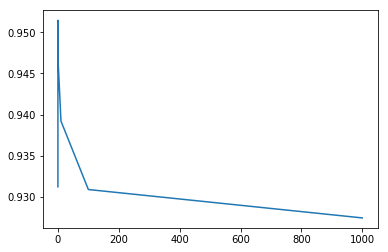

In [38]:
plt.plot(interval, mean_scores)
plt.show()

In [39]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.6221574344023323

## Movies

In [5]:
data_movies = pd.read_csv('../csv/movie_reviews.csv')
review_list_movies=np.array(list(data_movies.review))
target_movies = np.array(data_movies.label)

In [7]:
print(np.count_nonzero(data_movies.label == -1) / len(data_movies))
print(np.count_nonzero(data_movies.label == 1) / len(data_movies))

0.8365562575786585
0.1634437424213415


In [42]:
len(data)

53814

### 1) version 1 : (PP: remove numbers + remove accent + 10000 features)

In [43]:
fname="movies/v1"

In [44]:
#[vectorizer, X] = build_vectorizer(review_list_movies,stopwords=None, \
#                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000)
#save_vectorizer(vectorizer,fname)

In [45]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))

In [46]:
features = vectorizer.get_feature_names()
print(len(features))

10000


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [48]:
#vectorizer.get_feature_names()
print(np.count_nonzero(y_test == -1) / len(y_test))

0.8366305041480536


In [49]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores))

In [50]:
mean_scores[0]

0.2776777775241919

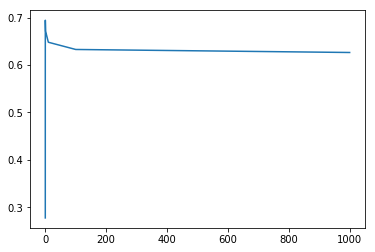

In [51]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [52]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9456774984671981

### 2) version 2 : (PP: remove numbers + remove accent +remove stopwords+ steemming+10000 features)

In [72]:
fname="movies/v2"

In [54]:
#[vectorizer, X] = build_vectorizer(review_list_movies, stopwords=fr_stopwords, b_stemming=True,\
#                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

In [73]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [75]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

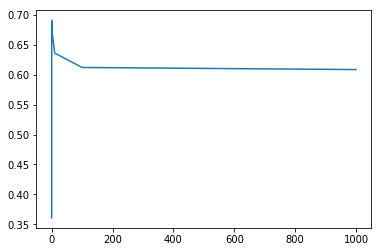

In [76]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [77]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9468622857847367

In [60]:
words_freq=get_words_freq(vectorizer, X)

In [61]:
max(map(lambda x: x[1],words_freq))

22221

In [62]:
min(map(lambda x: x[1],words_freq))

2

### 3) version 3 : (PP: remove numbers + remove accent +steemming+min_f=0.0002 +max_f=0.02)

In [63]:
fname="movies/v3"

In [64]:
#[vectorizer, X] = build_vectorizer(review_list_movies,b_rmaccent=True, b_rmnumbers=True,min_df=0.001,max_df=0.3)

#save_vectorizer(vectorizer,fname)

In [65]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [67]:
features = vectorizer.get_feature_names()
print(len(features))

4136


In [68]:
words_freq=get_words_freq(vectorizer, X)

In [69]:
min(map(lambda x: x[1],words_freq))

16

In [70]:
max(map(lambda x: x[1],words_freq))

6340

In [71]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

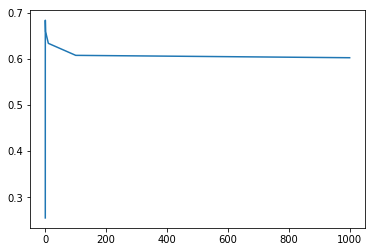

In [72]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [73]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9443354585581167

## Tweets Traduis

In [51]:
data_git = pd.read_csv("../csv/tweets_git.csv")
tweet_list_start=np.array(data_git.review)[:10000].astype('U')
tweet_list_end=np.array(data_git.review)[-10000:].astype('U')
label_list_start=np.array(data_git.label)[:10000]
label_list_end=np.array(data_git.label)[-10000:]

In [5]:
print(np.count_nonzero(data_git.label == -1) / len(data_git))
print(np.count_nonzero(data_git.label == 1) / len(data_git))

0.5034518552265773
0.4965481447734227


In [56]:
target_tweets = np.append(label_list_start,label_list_end)



In [55]:
tweet_list = np.append(tweet_list_start,tweet_list_end)

In [9]:
len(tweet_list)


20000

In [10]:
len(target_tweets)

20000

In [11]:
print(np.count_nonzero(target_tweets == -1) / len(target_tweets))
print(np.count_nonzero(target_tweets == 1) / len(target_tweets))

0.4999
0.5001


### 1) version 1 : (PP: remove numbers + remove accent + 10000 features)

In [84]:
fname="twitter/v1"

In [14]:
#[vectorizer, X] = build_vectorizer(tweet_list, stopwords=None, \
#                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

In [85]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [87]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

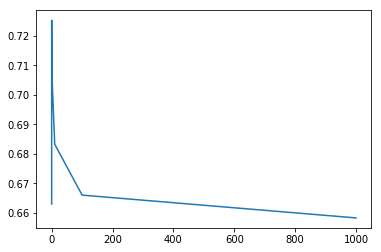

In [88]:
plt.plot(interval, mean_scores)
plt.show()

In [89]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7311666666666666

### 2) version 2 : (PP: remove numbers + remove accent +remove stopwords+ steemming+10000 features)


In [20]:
fname="twitter/v2"

In [ ]:
#[vectorizer, X] = build_vectorizer(tweet_list, stopwords=fr_stopwords, b_stemming=True,\
#                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000)

#save_vectorizer(vectorizer,fname)

In [21]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [23]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

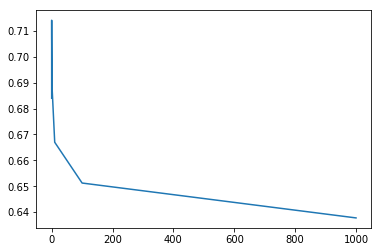

In [24]:
plt.plot(interval, mean_scores)
plt.show()

In [25]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.7241666666666666

In [26]:
words_freq=get_words_freq(vectorizer, X)


In [27]:
max(map(lambda x: x[1],words_freq))

1305

In [28]:
min(map(lambda x: x[1],words_freq))

1

### 3) version 3 : (PP: remove numbers + remove accent +steemming+min_f=0.0002 +max_f=0.02)

In [29]:
fname="twitter/v3"

In [ ]:
#[vectorizer, X] = build_vectorizer(tweet_list,b_rmaccent=True, b_rmnumbers=True,min_df=0.0002,max_df=0.02)

#save_vectorizer(vectorizer,fname)

In [30]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

/home/arij/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [31]:
features = vectorizer.get_feature_names()
print(len(features))

4911


In [32]:
words_freq=get_words_freq(vectorizer, X)

In [33]:
4515 / np.array(words_freq)[:,1].astype(int).sum()

0.040083451704545456

In [34]:
min(map(lambda x: x[1],words_freq))

4

In [35]:
max(map(lambda x: x[1],words_freq))

415

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [37]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

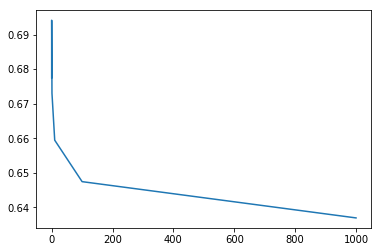

In [38]:
plt.plot(interval, mean_scores)
plt.show()

In [39]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)

0.707

## Transfert :

On va récuperer pour chaque jeu des donnes le meilleur classifeur appris et on va le tester sur les deux bases

### Classifeur + Vectorizer Decathlon 

In [62]:
fname="decathlon/v1"

In [63]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))
C_opt=0.1
clf = LinearSVC(C=C_opt)
clf.fit(X,target)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [65]:
#score sur les donnees Movies
X_movies= vectorizer.fit_transform(review_list_movies.astype('U'))
y_pred=clf.predict(X_movies)
f1_score(target_movies,y_pred,pos_label=-1)

0.1973408922183978

In [66]:
clf.score(X_movies,target_movies)

0.24098538515540238

In [71]:
#score sur les donnees Tweets_git
X_tweets= vectorizer.fit_transform(tweet_list.astype('U'))
y_pred=clf.predict(X_tweets)
f1_score(target_tweets,y_pred,pos_label=-1)

0.1391775080764865

In [70]:
clf.score(X_tweets,target_tweets)

0.50705

### Classifeur + Vectorizer Movies

In [79]:
fname="movies/v2"
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))
C_opt=0.01
clf = LinearSVC(C=C_opt)
clf.fit(X,target_movies)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [80]:
#score sur les donnees Tweets_git
X_tweets= vectorizer.fit_transform(tweet_list.astype('U'))
y_pred=clf.predict(X_tweets)
f1_score(target_tweets,y_pred,pos_label=-1)

0.6663769763010997

In [81]:
clf.score(X_tweets,target_tweets)

0.50095

In [82]:
#score sur les donnees Decathlon
X_decathlon= vectorizer.fit_transform(review_list.astype('U'))
y_pred=clf.predict(X_decathlon)
f1_score(target,y_pred,pos_label=-1)

0.22696417659008705

In [83]:
clf.score(X_decathlon,target)

0.1302449176794143

### Classifeur + Vectorizer Twitter

In [91]:
fname="twitter/v1"

In [92]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))
C_opt=0.01
clf = LinearSVC(C=C_opt)
clf.fit(X,target_tweets)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [93]:
#score sur les donnees Decathlon
X_decathlon= vectorizer.fit_transform(review_list.astype('U'))
y_pred=clf.predict(X_decathlon)
f1_score(target,y_pred,pos_label=-1)

0.2134589196550159

In [94]:
clf.score(X_decathlon,target)

0.7424090385401568

In [95]:
#score sur les donnees Movies
X_movies= vectorizer.fit_transform(review_list_movies.astype('U'))
y_pred=clf.predict(X_movies)
f1_score(target_movies,y_pred,pos_label=-1)

0.44340631507851636

In [96]:
clf.score(X_movies,target_movies)

0.3688812304550386

##  Classification des tweets originaux

In [2]:
fname="../misc/tweets_10000"

In [3]:
f = open(fname, "rb")
tweets = pickle.load(f)
f.close()

In [6]:
#Vectorizer Movies
fname="movies/v2"
vectorizer1=load_vectorizer(fname)
X= vectorizer1.fit_transform(review_list_movies.astype('U'))
C_opt=0.01
clf1 = LinearSVC(C=C_opt)
clf1.fit(X,target_movies)

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
#score sur les donnees Tweets originaux
X_tweets1= vectorizer1.fit_transform(tweets.astype('U'))
y_pred1=clf1.predict(X_tweets1)

In [14]:
ind_neg = np.argsort(clf1.coef_).flatten()[0:10]
ind_pos = np.argsort(clf1.coef_).flatten()[clf1.coef_.shape[1]-10:]
np.sort(clf1.coef_)

array([[-0.36758673, -0.33621885, -0.33265686, ...,  0.40343735,
         0.40560196,  0.43336431]])

In [15]:
np.array(vectorizer1.get_feature_names())[ind_neg]

array(['dowhatyoucan', 'empapaout', 'mâtur', 'évit', 'natur', 'tribun',
       'match', 'méchancon', 'ignorent', 'doutent'], dtype='<U30')

In [16]:
np.array(vectorizer1.get_feature_names())[ind_pos]

array(['parfait', 'coraliecarm', 'sénior', 'longtemp',
       'cpasbourdinleboss', 'medefdt', 'equivalent', 'fumister', '4m',
       'be'], dtype='<U30')

In [8]:
print("Nombre des tweets classés positive :")
print("------->",len(np.argwhere(y_pred1==1)))

Nombre des tweets classés positive :
-------> 2


In [9]:
print("Nombre des tweets classés négative")
print("------->",len(np.argwhere(y_pred1==-1)))

Nombre des tweets classés négative
-------> 9998


In [75]:
tweets[tweets == 'Fin de campagne fébrile et tendue pour Emmanuel Macron']

array([],
      dtype='<U252')

In [148]:
ind = np.random.choice(range(0,len(tweets)), 5, replace=False)

for i in ind:
    print(tweets[i], y_pred1[i], y_pred2[i])

'mdr le papillon dans fantasy life j'ai cru il s'appelait fillon' -1 1
'Présidentielle : Macron tacle à nouveau Hollande https://t.co/73c07uVyYz #Economie #FrancoisHollande https://t.co/AGSpG4G6d2' -1 1
'Tout va bien. susp_pts  Ils ont coulé la France mais organisent des fêtes et des concerts. susp_pts  Surréaliste. susp_pts  https://t.co/3JFwzmDPqG' -1 1
'Le pauvre chou  single_excl  Ils font rien que d'l'embêter  mult_int  https://t.co/swfGfqC5Kr' -1 -1
'#LeMonde #Info François Fillon courtise l’électorat catholique dans la dernière ligne droite https://t.co/Cs9zuZMIi3' -1 1


In [32]:
print("Les tweets classés positive")
for tweet in tweets[np.argwhere(y_pred1==1)]:
    print("*********************")
    print(tweet)
    

*********************
["'@LCI @MLP_officiel bonjour pourquoi Marine en baisse meeting dans une ferme foule single_int pas d'image du meeting de Macron… https://t.co/ztWYTGStXO'"]
*********************
["'Alexandre Jardin provoque un malaise au meeting de Macron - 7SUR7.be https://t.co/2IaP9XCXkm'"]


In [33]:
print("Les tweets classés negative")
for tweet in tweets[np.argwhere(y_pred1==-1)[:20]]:
    print("*********************")
    print(tweet)

Les tweets classés positivement
*********************
["'@JJBourdin_RMC Pourquoi ne pas passer des extraits des interviews de Fillon avant,pendant et après les primaires. Ç… https://t.co/iF05jgqH4j'"]
*********************
['\'Mdrrr a la fin il avait dit " je craint degun " https://t.co/Sj9Hw5leSj\'']
*********************
["'Couverts par le #PS.\n#Antifa #Délinquance #Extrêmegauche #Hollande #frontnational #MarineLePen #FN #news #infos\nhttps://t.co/uFxXop6ZUf'"]
*********************
["'Sarkozy inspire Macron  single_int  Depuis le temps que je dis que le progr éco de Macron est proche de celui de NS.  susp_pts  https://t.co/sStugB2tXR'"]
*********************
["'Appel de 31 entrepreneurs, investisseurs et acteurs du numérique à voter pour François Fillon… https://t.co/EopHmYF1Jv'"]
*********************
["'Emmanuel #Macron l'escroquerie en marche \nhttps://t.co/YU0U3r7xYG via @YouTube'"]
*********************
["'@SlmLyon @BobLeCentriste Être de gauche, c'est avoir du respect pour to

In [57]:
#Vectorizer Twitter git
fname="twitter/v1"
vectorizer2=load_vectorizer(fname)
X= vectorizer2.fit_transform(tweet_list.astype('U'))
C_opt=0.01
clf2 = LinearSVC(C=C_opt)
clf2.fit(X,target_tweets)

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [58]:
#score sur les donnees Tweets originaux
X_tweets2= vectorizer2.fit_transform(tweets.astype('U'))
y_pred2=clf2.predict(X_tweets2)

In [59]:
ind_neg = np.argsort(clf2.coef_).flatten()[0:10]
ind_pos = np.argsort(clf2.coef_).flatten()[clf2.coef_.shape[1]-10:]
np.sort(clf2.coef_)

array([[-0.65149854, -0.54937986, -0.53465076, ...,  0.35692163,
         0.41224441,  0.44489355]])

In [60]:
np.array(vectorizer2.get_feature_names())[ind_neg]

array(['supplémentaires', 'mode', 'choix', 'luttent', 'loin', 'dépêche',
       'officiers', 'FRANCE24', 'chirurgien', 'loi'],
      dtype='<U32')

In [61]:
np.array(vectorizer2.get_feature_names())[ind_pos]

array(['Hormis', 'marteau', 'Fion', 'flinguer', 'ferais', 'familiale',
       'adhésion', 'Naïveté', 'Arrêtons', 'ElongWilliam'],
      dtype='<U32')

In [62]:
print("Nombre des tweets classés positive :")
print("------->",len(np.argwhere(y_pred2==1)))

Nombre des tweets classés positive :
-------> 7694


In [63]:
print("Nombre des tweets classés négative")
print("------->",len(np.argwhere(y_pred2==-1)))

Nombre des tweets classés négative
-------> 2306


In [64]:
print("Les tweets classés positive")
for tweet in tweets[np.argwhere(y_pred2==1)[:20]]:
    print("*********************")
    print(tweet)

Les tweets classés positive
*********************
[ "'@JJBourdin_RMC Pourquoi ne pas passer des extraits des interviews de Fillon avant,pendant et après les primaires. Ç… https://t.co/iF05jgqH4j'"]
*********************
[ '\'Mdrrr a la fin il avait dit " je craint degun " https://t.co/Sj9Hw5leSj\'']
*********************
[ "'Emmanuel #Macron l'escroquerie en marche \nhttps://t.co/YU0U3r7xYG via @YouTube'"]
*********************
[ "'@SlmLyon @BobLeCentriste Être de gauche, c'est avoir du respect pour tous, et pas le mépris social affiché par macron'"]
*********************
[ "'@Ecogine2 @RomainLesenne @JAMmontpellier @Chamade69 j'en ai pas mais j'ai autre chose https://t.co/36Gcb6zA50'"]
*********************
[ "'France: montée de Mélenchon, même la gauche traditionnelle https://t.co/X6FKoG2sNP s'inquiète autant que la droite. https://t.co/VXtMI3cygy'"]
*********************
[ "'@Ecogine2 @RomainLesenne @JAMmontpellier @Chamade69 et j'ai ca aussi https://t.co/c0b4ueINfc'"]
*************

In [36]:
print("Les tweets classés negative")
for tweet in tweets[np.argwhere(y_pred2==-1)[:10]]:
    print("*********************")
    print(tweet)

Les tweets classés negative
*********************
["'Couverts par le #PS.\n#Antifa #Délinquance #Extrêmegauche #Hollande #frontnational #MarineLePen #FN #news #infos\nhttps://t.co/uFxXop6ZUf'"]
*********************
["'Sarkozy inspire Macron  single_int  Depuis le temps que je dis que le progr éco de Macron est proche de celui de NS.  susp_pts  https://t.co/sStugB2tXR'"]
*********************
["'Appel de 31 entrepreneurs, investisseurs et acteurs du numérique à voter pour François Fillon… https://t.co/EopHmYF1Jv'"]
*********************
["'Pr%C3%A9sidentielle+2017+%3A+au+Portugal%2C+Beno%C3%AEt+Hamon+parle+l%C3%A9galisation+du+cannabis via @cnewsmatin'"]
*********************
["' susp_pts @Marion_M_Le_Pen @FrontNational67 @Federation_FN68 @68avecMarine @ludo68100 @GregoryStich @L_Lareymondie… https://t.co/ToeLJb3oxY'"]
*********************
["'Les seuls à se rendre compte du prob st Fillon et Le Pen.Mais l'un est un démocrate,l'autre non.'"]
*********************
["'Quel dommage que ça